In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
#1.Load the Titanic dataset into a Pandas DataFrame and display the first 10 rows, the shape of the dataset, and summary statistics using .describe() and .info().

df = pd.read_csv("Titanic-Dataset.csv")
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#2.Identify and handle missing values: fill missing Age values with the median, fill missing Embarked values with the most frequent category, and drop the Cabin column due to excessive missing values.
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)

/var/folders/69/3hb4cf810r91ryd5xh9c8tk40000gn/T/ipykernel_42631/2094921387.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/var/folders/69/3hb4cf810r91ryd5xh9c8tk40000gn/T/ipykernel_42631/2094921387.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values al

In [8]:
#3. Create a new feature called FamilySize by adding SibSp + Parch + 1, and extract the Title (e.g., Mr, Mrs) from the Name column using string operations.

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())


In [ ]:
#4. Bin the Age column into 5 equal-width age groups using pd.cut and assign each passenger to an age group category.

df['AgeGroup'] = pd.cut(df['Age'], bins=5, labels=["Very Young", "Young", "Adult", "Senior", "Old"])


In [9]:
#5. Convert categorical columns Sex and Embarked to numeric format using one-hot encoding with pd.get_dummies(), and keep only the necessary columns.

df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)



In [10]:
#6.Drop irrelevant columns such as PassengerId, Ticket, Name, and any columns that won’t be used in modeling.

df.drop(columns=['PassengerId', 'Ticket', 'Name'], inplace=True)


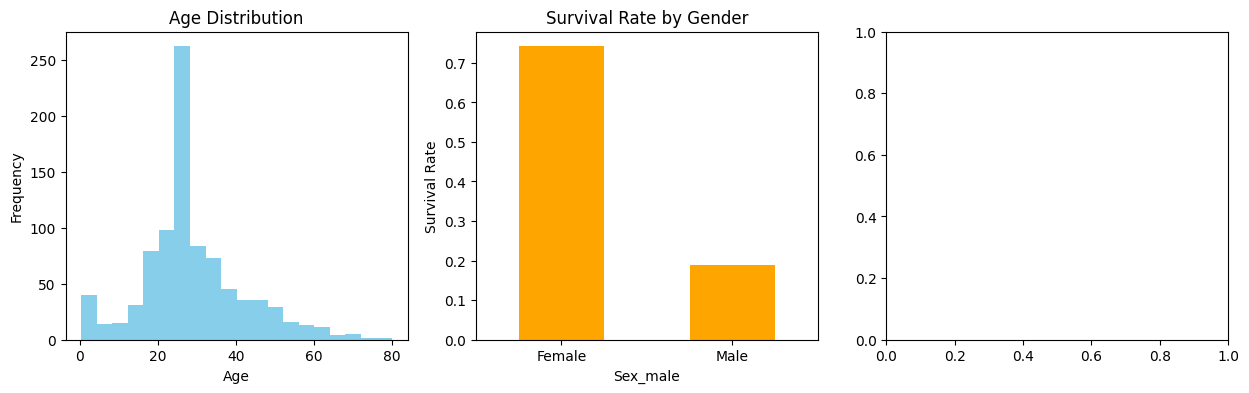

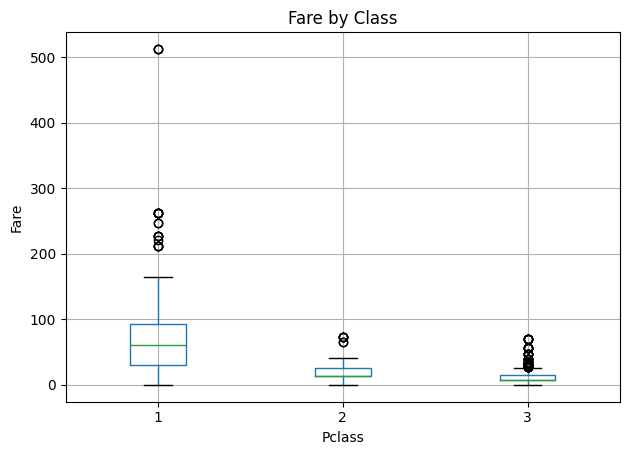

In [12]:
#7. Visualize the dataset using Matplotlib: plot a histogram of Age, a bar chart of survival counts by gender, and a box plot showing fare distribution for each passenger class (Pclass).

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.hist(df['Age'], bins=20, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
survived_by_gender = df.groupby('Sex_male')['Survived'].mean()
survived_by_gender.plot(kind='bar', color='orange')
plt.title('Survival Rate by Gender')
plt.xticks([0, 1], ['Female', 'Male'], rotation=0)
plt.ylabel('Survival Rate')

plt.subplot(1, 3, 3)
df.boxplot(column='Fare', by='Pclass')
plt.title('Fare by Class')
plt.suptitle('')
plt.xlabel('Pclass')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

In [13]:
#8. Use NumPy to convert the Fare and Age columns to arrays and manually compute their mean, median, and standard deviation, then apply min-max normalization to both columns using NumPy operations.

fare_arr = df['Fare'].values
age_arr = df['Age'].values

print("\nFare stats (NumPy):")
print("Mean:", np.mean(fare_arr))
print("Median:", np.median(fare_arr))
print("Std Dev:", np.std(fare_arr))

df['Fare_Normalized'] = (fare_arr - np.min(fare_arr)) / (np.max(fare_arr) - np.min(fare_arr))
df['Age_Normalized'] = (age_arr - np.min(age_arr)) / (np.max(age_arr) - np.min(age_arr))




Fare stats (NumPy):
Mean: 32.204207968574636
Median: 14.4542
Std Dev: 49.6655344447741


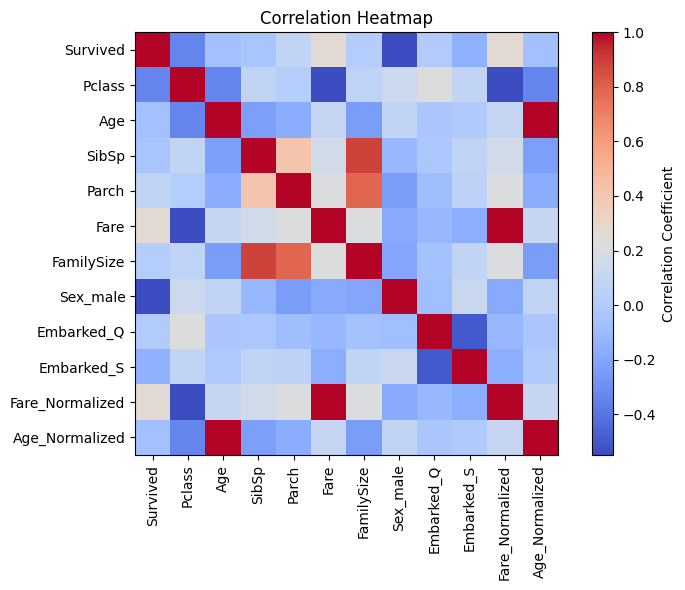

In [14]:
#9. Compute the correlation matrix of all numerical features in the dataset and visualize it using Matplotlib’s imshow() to simulate a heatmap view.
correlation = df.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
plt.imshow(correlation, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns, rotation=90)
plt.yticks(ticks=np.arange(len(correlation.columns)), labels=correlation.columns)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()



In [15]:
#10. Split the cleaned dataset into input features X and target label y (Survived), then save the final processed dataset as a new CSV file named titanic_cleaned.csv.

X = df.drop(columns=['Survived'])
y = df['Survived']
df.to_csv("titanic_cleaned.csv", index=False)

print("\nPreprocessing Complete. File saved as 'titanic_cleaned.csv'")


Preprocessing Complete. File saved as 'titanic_cleaned.csv'
